In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

### Загрузка и знакомство с датасетом

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

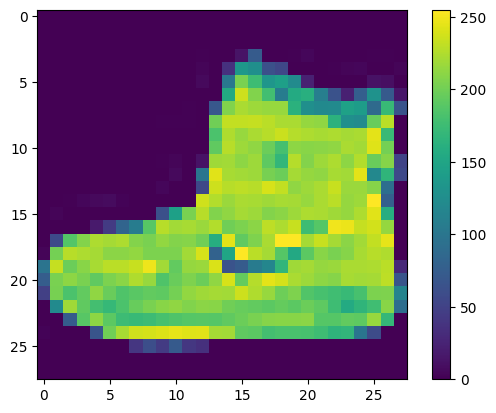

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Нормализация

train_images = train_images / 255.0

test_images = test_images / 255.0

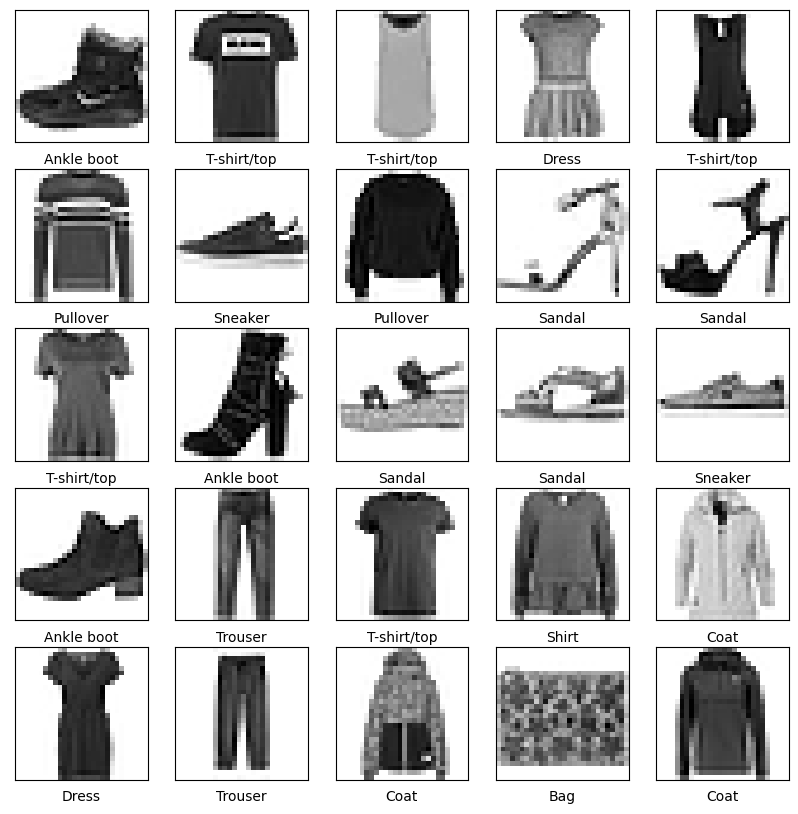

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Создание и тренировка модели

In [11]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [12]:
def report(genuine, predicted):
    to_nums = []
    
    for el in predicted:
        to_nums.append(np.argmax(el))
        
    print('REPORT\n\n' + classification_report(genuine, to_nums))
    print('CONFUSION MATRIX\n')
        
    print(pd.crosstab(genuine, to_nums))

**Модель из урока**

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=3, verbose=2)

Epoch 1/3
1875/1875 - 1s - loss: 0.4986 - accuracy: 0.8243 - 1s/epoch - 797us/step
Epoch 2/3
1875/1875 - 1s - loss: 0.3753 - accuracy: 0.8644 - 1s/epoch - 663us/step
Epoch 3/3
1875/1875 - 1s - loss: 0.3329 - accuracy: 0.8786 - 1s/epoch - 663us/step


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 680us/step


In [18]:
predictions[7]

array([5.4567045e-05, 3.0621626e-07, 4.5542754e-03, 7.9920726e-05,
       1.5722003e-02, 8.4709706e-07, 9.7956890e-01, 4.6607784e-09,
       1.9024355e-05, 6.8363562e-08], dtype=float32)

In [19]:
np.argmax(predictions[7])

6

In [20]:
test_labels[7]

6

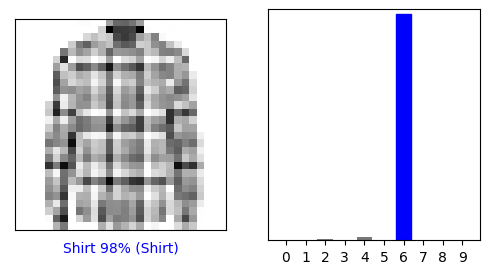

In [21]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

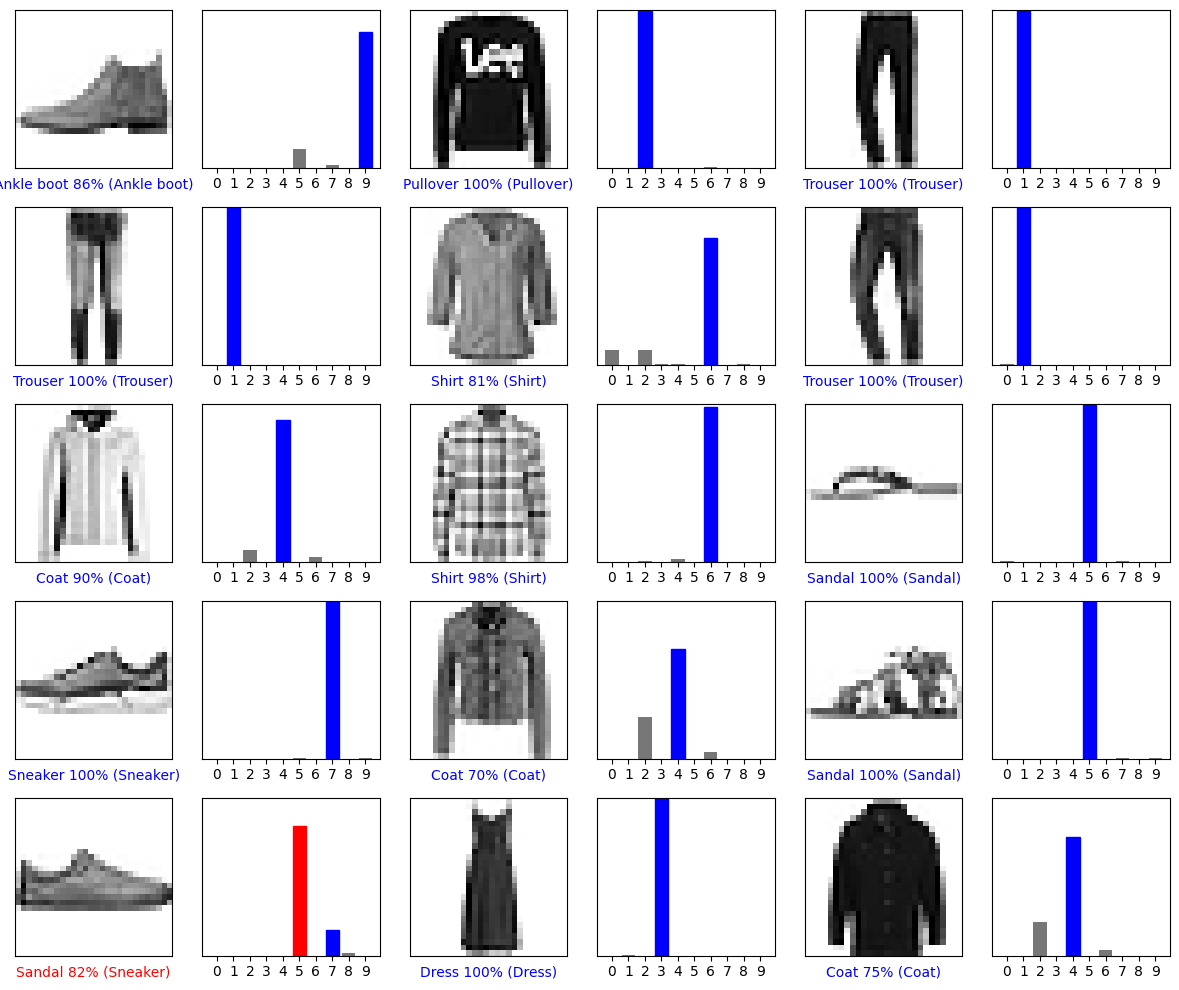

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [23]:
report(test_labels, predictions)

REPORT

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.73      0.84      0.78      1000
           3       0.85      0.91      0.88      1000
           4       0.81      0.72      0.76      1000
           5       0.95      0.97      0.96      1000
           6       0.66      0.69      0.68      1000
           7       0.95      0.92      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

CONFUSION MATRIX

col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0      769    0   30   50    5    1  137    0    8    0
1        1  960    2   28    4    0    5    0  

**Пробуем повысить метрику сменой функции активации и метрики**

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),  # больше подходит для классификации
    keras.layers.Dense(10)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalCrossentropy(name='precision')]) # presision - снижаем долю FP

In [40]:
model.fit(train_images, train_labels, epochs=3, verbose=2)

Epoch 1/3
1875/1875 - 1s - loss: 0.5375 - precision: 1.1318 - 1s/epoch - 785us/step
Epoch 2/3
1875/1875 - 1s - loss: 0.3897 - precision: 1.0048 - 1s/epoch - 698us/step
Epoch 3/3
1875/1875 - 1s - loss: 0.3522 - precision: 0.9544 - 1s/epoch - 759us/step


In [41]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [42]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 705us/step


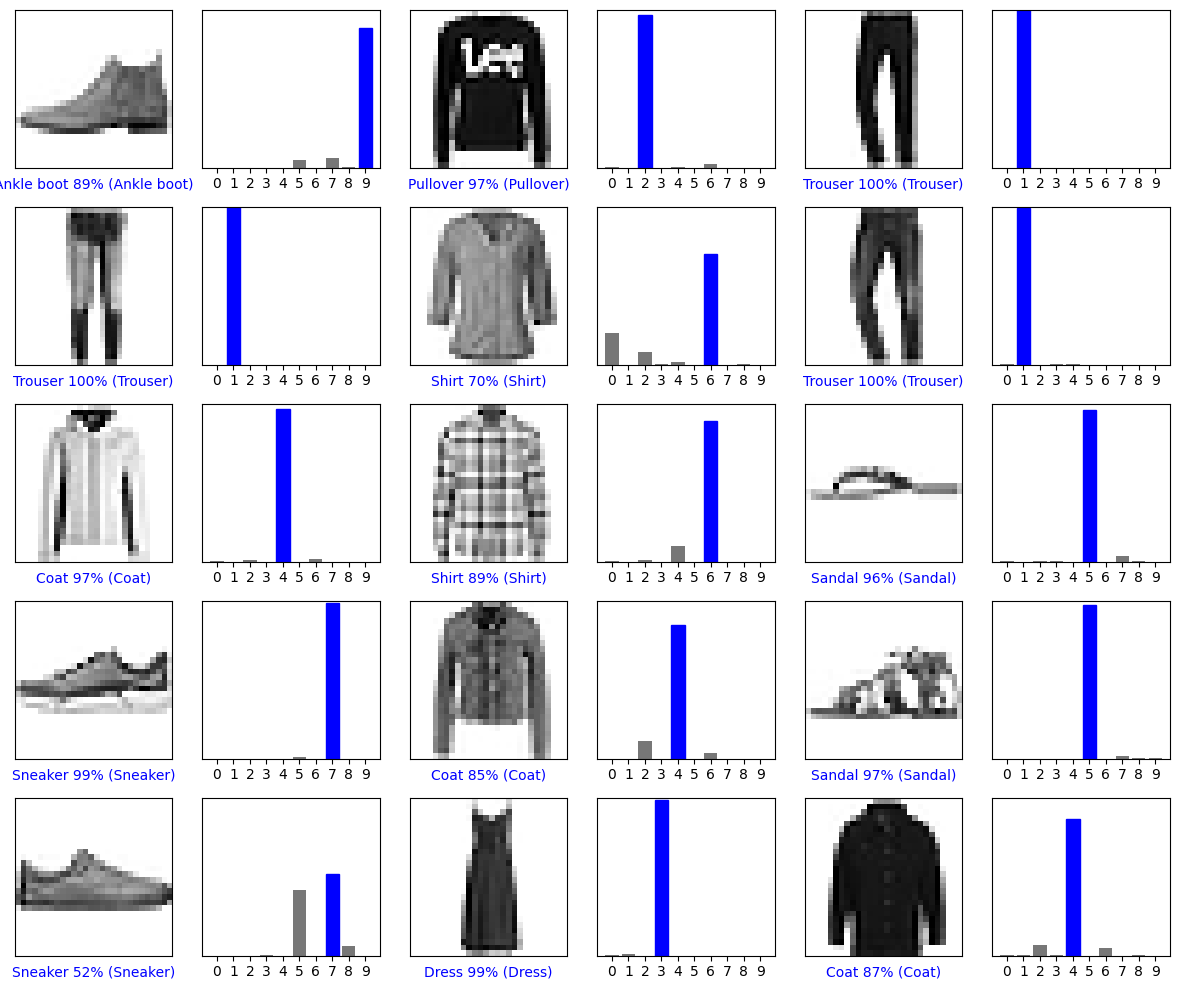

In [43]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [44]:
report(test_labels, predictions)

REPORT

              precision    recall  f1-score   support

           0       0.77      0.89      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.78      0.76      0.77      1000
           3       0.88      0.88      0.88      1000
           4       0.74      0.82      0.78      1000
           5       0.96      0.94      0.95      1000
           6       0.73      0.56      0.64      1000
           7       0.93      0.92      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000

CONFUSION MATRIX

col_0    0    1    2    3    4    5    6    7    8    9
row_0                                                  
0      889    2   13   26    5    3   53    0    9    0
1        3  962    2   22    5    0    5    0  

Метрики повысились

**Задание 2:** <br> Более подробно разобрала раздел metrics в документации TensorFlow